In [1]:
import sys
import os
if not any(path.endswith('textbook') for path in sys.path):
    sys.path.append(os.path.abspath('../../..'))
from textbook_utils import *

(ch:pandas_subsetting)=
# Subsetting


This section introduces operations for taking subsets of dataframes. When data
scientists first read in a dataframe, they often want to subset the specific
data that they plan to use. For example, a data scientist can *slice* out the
ten relevant features from a dataframe with hundreds of columns. Or, they can
*filter* a dataframe to remove rows with incomplete data. For the rest of this
chapter, we'll introduce dataframe operations using a dataframe of baby names.

## About the Data

There's a [2021 New York Times article](https://www.nytimes.com/2021/06/12/style/lilibet-popular-baby-names.html) that talks about Prince Harry and
Meghan's unique choice for their new baby daughter's name: Lilibet. The article has an interview with Pamela Redmond,
an expert on baby names, who talks about interesting trends in how people name
their kids. For example, she says that names that start with the letter "L"
have become very popular in recent years, while names that start with the
letter "J" were most popular in the 1970s and 1980s. Are these claims reflected
in data? We can use `pandas` to find out.

First, import the package as `pd`, the canonical abbreviation:

In [2]:
import pandas as pd

We have a dataset of baby names stored in a comma-separated values (CSV) file
called `babynames.csv`. Use the `pd.read_csv` function to read the file as a
`pandas.DataFrame` object.

In [3]:
baby = pd.read_csv('babynames.csv')
baby

,Name,Sex,Count,Year
0,Liam,M,19659,2020
1,Noah,M,18252,2020
2,Oliver,M,14147,2020
...,...,...,...,...
2020719,Verona,F,5,1880
2020720,Vertie,F,5,1880
2020721,Wilma,F,5,1880


The data in the `baby` table comes from the [US Social Security department](https://www.ssa.gov/oact/babynames/index.html),
which records the baby name and birth sex for birth certificate purposes. They
make the baby names data available on their website.
We've loaded this data into the `baby` table.

The Social Security website has a page that describes the data in more detail
([link](https://www.ssa.gov/oact/babynames/background.html)). We won't go
in-depth in this chapter about the data's limitations, but we'll point out
this relevant quote from the website:

> All names are from Social Security card applications for births that occurred
> in the United States after 1879. Note that many people born before 1937 never
> applied for a Social Security card, so their names are not included in our
> data. For others who did apply, our records may not show the place of birth,
> and again their names are not included in our data.
>
> All data are from a 100% sample of our records on Social Security card
> applications as of March 2021.

## DataFrames and Indices

Let's examine the `baby` dataframe in more detail. A dataframe has rows and
columns. Every row and column has a label, as highlighted in
{numref}`fig:baby-labels`. 

```{figure} figures/baby-labels.svg
---
name: fig:baby-labels
alt: baby-labels
---
The `baby` dataframe has labels for both rows and columns (boxed).
```

By default, `pandas` assigns row labels as incrementing numbers starting from
0. In this case, the data at the row labeled `0` and column labeled `Name` has
the data `'Liam'`.

Dataframes can also have strings as row labels. {numref}`fig:dog-labels` shows
a dataframe of dog data where the row labels are strings.

```{figure} figures/dog-labels.svg
---
name: fig:dog-labels
alt: dog-labels
---
Row labels in dataframes can also be strings. In this example, each row is
labeled using the dog breed name.
```

The row labels have a special name. We call them the **index** of a dataframe,
and `pandas` stores the row labels in a special `pandas.Index` object. We won't
discuss the `pandas.Index` object since it's not very common to manipulate the
index itself. But, it's important to remember that even though the index looks
like a column of data, the index really represents row labels, not data. For
instance, the dataframe of dog breeds has 4 columns of data, not 5, since
the index doesn't count as a column.

## Slicing

*Slicing* is an operation that creates a new dataframe by taking a subset of
rows or columns out of another dataframe. Think about slicing a tomato---slices
can go both vertially and horizontally. To take slices of a dataframe in
`pandas`, we use the `.loc` and `.iloc` properties. Let's start with `.loc`.

Here's the full `baby` dataframe:

In [4]:
baby

,Name,Sex,Count,Year
0,Liam,M,19659,2020
1,Noah,M,18252,2020
2,Oliver,M,14147,2020
...,...,...,...,...
2020719,Verona,F,5,1880
2020720,Vertie,F,5,1880
2020721,Wilma,F,5,1880


`.loc` lets you select rows and columns using their labels. For example, to get the data in the row labeled `1` and column labeled `Name`:

In [5]:
#        The first argument is the row label
#        ↓
baby.loc[1, 'Name']
#            ↑
#            The second argument is the column label

'Noah'

:::{warning}
Notice that `.loc` needs brackets; running `baby.loc(1, 'Name')` will error.
:::

To slice out multiple rows or column, you can use Python slice syntax instead
of individual values:

In [6]:
baby.loc[0:3, 'Name':'Count']

,Name,Sex,Count
0,Liam,M,19659
1,Noah,M,18252
2,Oliver,M,14147
3,Elijah,M,13034


To get an entire column of data, pass an empty slice as the first argument:

In [7]:
baby.loc[:, 'Count']

0          19659
1          18252
2          14147
           ...  
2020719        5
2020720        5
2020721        5
Name: Count, Length: 2020722, dtype: int64

Notice that the output of this doesn't look like a dataframe, and it's not.
Selecting out a single row or column of a dataframe produces a `pd.Series`
object.

In [8]:
counts = baby.loc[:, 'Count']
counts.__class__.__name__

'Series'

What's the difference between a `pd.Series` and `pd.DataFrame` object?
Essentially, a `pd.DataFrame` is two-dimensional---it has rows and columns and
represents a table of data. A `pd.Series` is one-dimensional---it represents a
list of data. `pd.Series` and `pd.DataFrame` objects have many methods in
common, but they really represent two different things. Confusing the two can
cause bugs and confusion.

To select specific columns of a dataframe, pass a list into `.loc`:

In [9]:
# Here's the original dataframe
baby

,Name,Sex,Count,Year
0,Liam,M,19659,2020
1,Noah,M,18252,2020
2,Oliver,M,14147,2020
...,...,...,...,...
2020719,Verona,F,5,1880
2020720,Vertie,F,5,1880
2020721,Wilma,F,5,1880


In [10]:
# And here's the dataframe with only Name and Year columns
baby.loc[:, ['Name', 'Year']]
#           └──────┬───────┘
#         list of column labels

,Name,Year
0,Liam,2020
1,Noah,2020
2,Oliver,2020
...,...,...
2020719,Verona,1880
2020720,Vertie,1880
2020721,Wilma,1880


Selecting columns is very common, so there's a shorthand.

In [11]:
# Shorthand for baby.loc[:, 'Name']
baby['Name']

0            Liam
1            Noah
2          Oliver
            ...  
2020719    Verona
2020720    Vertie
2020721     Wilma
Name: Name, Length: 2020722, dtype: object

In [12]:
# Shorthand for baby.loc[:, ['Name', 'Count']]
baby[['Name', 'Count']]

,Name,Count
0,Liam,19659
1,Noah,18252
2,Oliver,14147
...,...,...
2020719,Verona,5
2020720,Vertie,5
2020721,Wilma,5


Slicing using `.iloc` works similarly to `.loc`, except that `.iloc` uses the
*positions* of rows and columns rather than labels. It's easiest to show the
difference between `.iloc` and `.loc` when the dataframe index has strings, so
for demonstration purposes let's look at a dataframe with information on dog
breeds:

In [13]:
dogs = pd.read_csv('dogs.csv', index_col='breed')
dogs

,grooming,food_cost,kids,size
breed,,,,
Labrador Retriever,weekly,466.0,high,medium
German Shepherd,weekly,466.0,medium,large
Beagle,daily,324.0,high,small
Golden Retriever,weekly,466.0,high,medium
Yorkshire Terrier,daily,324.0,low,small
Bulldog,weekly,466.0,medium,medium
Boxer,weekly,466.0,high,medium


To get the first three rows and first two columns by position, use `.iloc`:

In [14]:
dogs.iloc[0:3, 0:2]

,grooming,food_cost
breed,,
Labrador Retriever,weekly,466.0
German Shepherd,weekly,466.0
Beagle,daily,324.0


The same operation using `.loc` requires you to use the dataframe labels:

In [15]:
dogs.loc['Labrador Retriever':'Beagle', 'grooming':'food_cost']

,grooming,food_cost
breed,,
Labrador Retriever,weekly,466.0
German Shepherd,weekly,466.0
Beagle,daily,324.0


Next, we'll look at filtering rows.

## Filtering Rows

So far, we've shown how to use `.loc` and `.iloc` to slice a dataframe using
labels and positions.

However, data scientists often want to *filter* rows---they want to take
subsets of rows using some criteria. Let's say you want to find the most
popular baby names in 2020. To do this, you can filter rows to keep only the
rows where the `Year` is 2020.

To filter, you can 1) check whether each value in the `Year`
column is equal to 1970, then 2) keep only those rows.

To compare each value in `Year`, slice out the column and make a boolean
comparison.
(This is similar to what you would do with a `numpy` array.)

In [16]:
# Here's the dataframe for reference
baby

,Name,Sex,Count,Year
0,Liam,M,19659,2020
1,Noah,M,18252,2020
2,Oliver,M,14147,2020
...,...,...,...,...
2020719,Verona,F,5,1880
2020720,Vertie,F,5,1880
2020721,Wilma,F,5,1880


In [17]:
# Get a Series with the Year data
baby['Year']

0          2020
1          2020
2          2020
           ... 
2020719    1880
2020720    1880
2020721    1880
Name: Year, Length: 2020722, dtype: int64

In [18]:
# Compare with 2020
baby['Year'] == 2020

0           True
1           True
2           True
           ...  
2020719    False
2020720    False
2020721    False
Name: Year, Length: 2020722, dtype: bool

Notice that a boolean comparison on a Series gives a Series of booleans. This
is nearly equivalent to writing:

```python
is_2020 = []
for value in baby['Year']:
    is_2020.append(value == 2020)
```

But the boolean comparison is easier to write and much faster to execute than a
`for` loop.

Now, we tell `pandas` to keep only the rows where the comparison evaluated to `True`:

In [19]:
# Passing a Series of booleans into .loc only keeps rows where the Series has
# a True value.
#        ↓
baby.loc[baby['Year'] == 2020, :]

,Name,Sex,Count,Year
0,Liam,M,19659,2020
1,Noah,M,18252,2020
2,Oliver,M,14147,2020
...,...,...,...,...
31267,Zylynn,F,5,2020
31268,Zynique,F,5,2020
31269,Zynlee,F,5,2020


In [20]:
# Filtering has a shorthand. This computes the same table as the snippet above
# without using .loc
baby[baby['Year'] == 2020]

,Name,Sex,Count,Year
0,Liam,M,19659,2020
1,Noah,M,18252,2020
2,Oliver,M,14147,2020
...,...,...,...,...
31267,Zylynn,F,5,2020
31268,Zynique,F,5,2020
31269,Zynlee,F,5,2020


Finally, to find the most common names in 2020, sort the dataframe by `Count`
in descending order.

In [21]:
# When you have a long expression, you can wrap it in parentheses, then add
# line breaks to make it more readable.
(baby[baby['Year'] == 2020]
 .sort_values('Count', ascending=False)
 .head(7) # take the first seven rows
)

,Name,Sex,Count,Year
0,Liam,M,19659,2020
1,Noah,M,18252,2020
13911,Emma,F,15581,2020
2,Oliver,M,14147,2020
13912,Ava,F,13084,2020
3,Elijah,M,13034,2020
13913,Charlotte,F,13003,2020


We see that Liam, Noah, and Emma were the most popular baby names in 2020.

## Example: How recently has Luna become a popular name?

The New York Times article mentions that the name "Luna" was almost nonexistent
before 2000 but has since grown to become a very popular name for girls.
When exactly did Luna become popular?
We can
check this using slicing and filtering. When approaching a data manipulation
task, we recommend breaking the problem down into smaller steps. For
example, we could think:

1. Filter: keep only rows with `'Luna'` in the `Name` column.
1. Filter: keep only rows with `'F'` in the `Sex` column.
1. Slice: keep the `Count` and `Year` columns.

Now, it's a matter of translating each step into code.

In [22]:
luna = baby[baby['Name'] == 'Luna'] # [1]
luna = luna[luna['Sex'] == 'F']     # [2]
luna = luna[['Count', 'Year']]      # [3]
luna

,Count,Year
13923,7770,2020
45366,7772,2019
77393,6929,2018
...,...,...
2014083,17,1883
2018187,18,1881
2020223,15,1880


In this book we use a library called `plotly` for plotting.
We won't go in-depth in plotting here
since we talk more about plotting in {numref}`Chapter %s <ch:viz>`.
For now, remember that you can use `px.line()` to make a simple line plot.

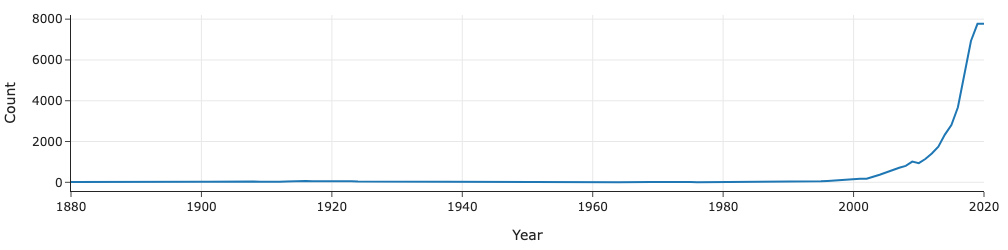

In [23]:
px.line(luna, x='Year', y='Count', width=350, height=250)

It's just as the article says. Luna wasn't popular at all until the year 2000
or so. Think about that---if someone tells you that their name is Luna, you can
take a pretty good guess at their age even without any other information about
them!

Just for fun, here's the same plot for the name Siri.

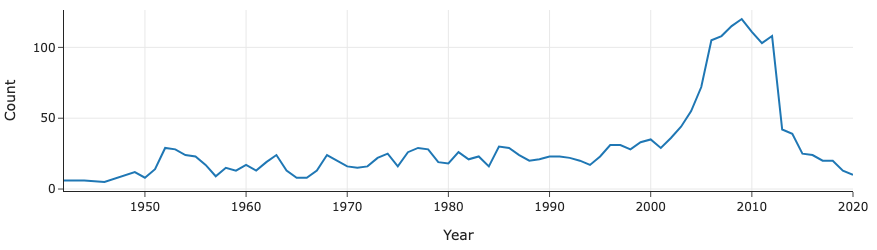

In [24]:
# Using .query is similar to using .loc with a boolean series. query() has more
# restrictions on what kinds of filtering you can do but can be convenient as a
# shorthand. 
siri = (baby.query('Name == "Siri"')
        .query('Sex == "F"'))
px.line(siri, x='Year', y='Count', width=350, height=250)

Why might the popularity have dropped so suddenly after 2010?
Well, Siri happens to be the
name of Apple's voice assistant and was introduced in 2011.
Let's draw a line for the year 2011 and take a look...

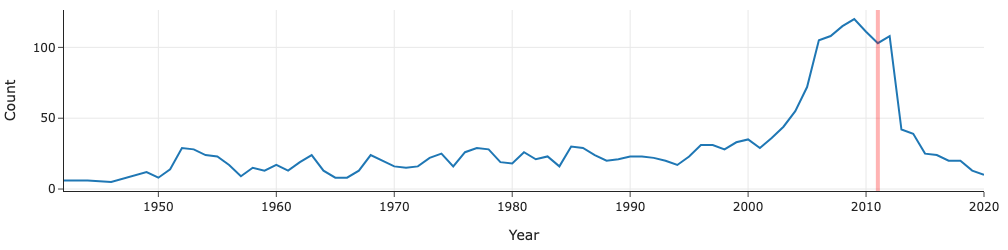

In [25]:
fig = px.line(siri, x='Year', y='Count', width=350, height=250)
fig.add_vline(x=2011, line_color='red', line_width=4)

It looks like parents don't want their kids to be confused when other
people say "Hey Siri" to their phones.

In this section, we introduced dataframes in `pandas`.
We've covered the common ways that data scientists subset dataframes---slicing
with labels and filtering using a boolean condition.
In the next section, we explain how to aggregate rows together.